In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'size'   : 20}
mpl.rc('font', **font)

In [28]:
base_dir = "../data/toa_scan/run_20190903_173925/"
run_dir = base_dir + ""

In [29]:
fnames = glob.glob(run_dir + "/*/*h5")

In [30]:
len(fnames)

2

In [31]:
dfs = []

for fname in fnames:
    df = pd.read_hdf(fname)
    dfs.append(df)

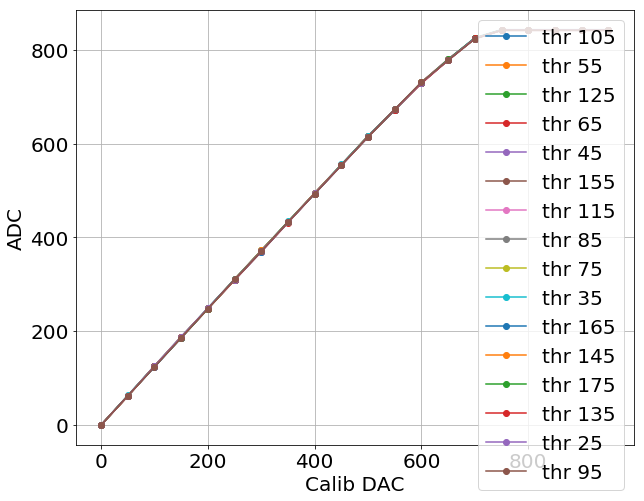

In [36]:
plt.figure(figsize = (10,8))

df_chans = dfs[1]

sel = df_chans.adc > 200
nhits = df_chans[sel].groupby("channel").size()
hit_chans = nhits.index.values

chan = hit_chans[0]
    
for thr in df_chans.toa_thr.unique():

    #for chan in hit_chans:
    sel = df_chans.channel == chan
    sel &= df_chans.toa_thr == thr
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("cal_dac")["adc"].mean()
    x = prof.index
    y = prof.values

    ped = y[x < 20].min()

    plt.plot(x,y - ped, "o-", label = "thr %i" %thr)

plt.legend()
plt.xlabel("Calib DAC")
plt.ylabel("ADC")

plt.grid()

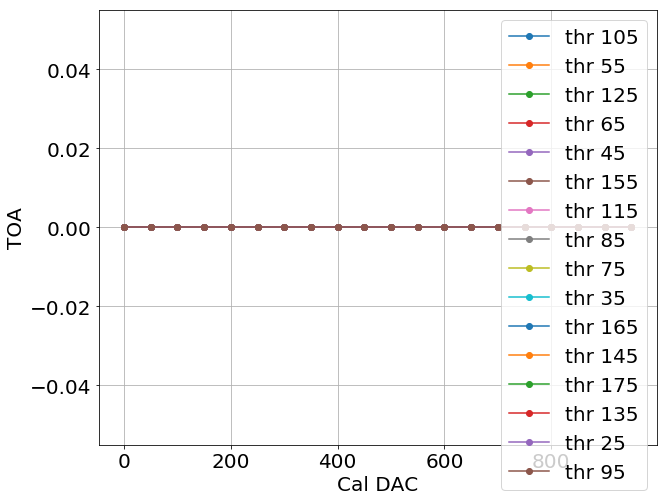

In [37]:
plt.figure(figsize = (10,8))

df_chans = dfs[1]

sel = df_chans.adc > 200
nhits = df_chans[sel].groupby("channel").size()
hit_chans = nhits.index.values

for thr in df_chans.toa_thr.unique():

    chan = hit_chans[0]
    #for chan in hit_chans:
    sel = df_chans.channel == chan
    sel &= df_chans.toa_thr == thr
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("cal_dac")["toa"].mean()
    x = prof.index
    y = prof.values

    ped = y[x < 20].min()

    plt.plot(x,y - ped, "o-", label = "thr %i" %thr)

plt.legend()
plt.xlabel("Cal DAC")
plt.ylabel("TOA")

plt.grid()

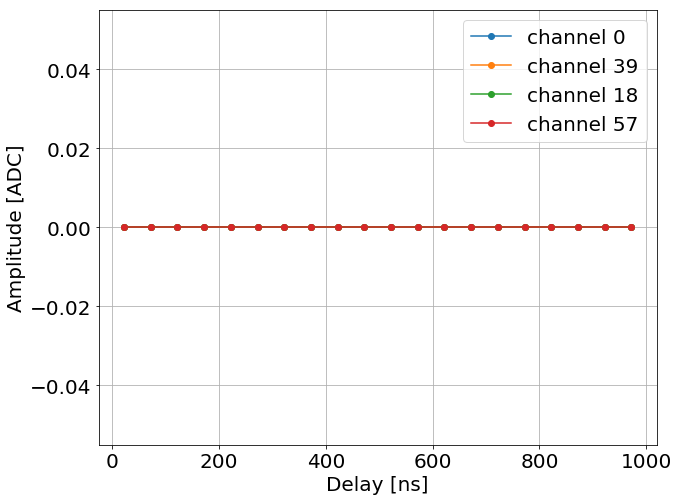

In [39]:
plt.figure(figsize = (10,8))

for df_chans in dfs:
    sel = df_chans.adc > 200
    nhits = df_chans[sel].groupby("channel").size()
    hit_chans = nhits.index.values
    
    for chan in hit_chans:
        sel = df_chans.channel == chan
        df_sel = df_chans[sel]

        # profile
        prof = df_sel.groupby("cal_dac")["toa"].median()
        x = prof.index
        y = prof.values

        plt.plot(x + 22,y, "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

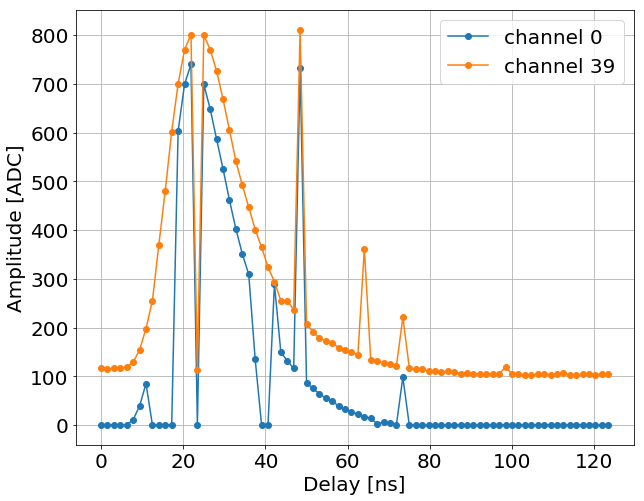

In [23]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index
    y = prof.values

    plt.plot(x + 25,y, "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

Text(0,0.5,'TOA')

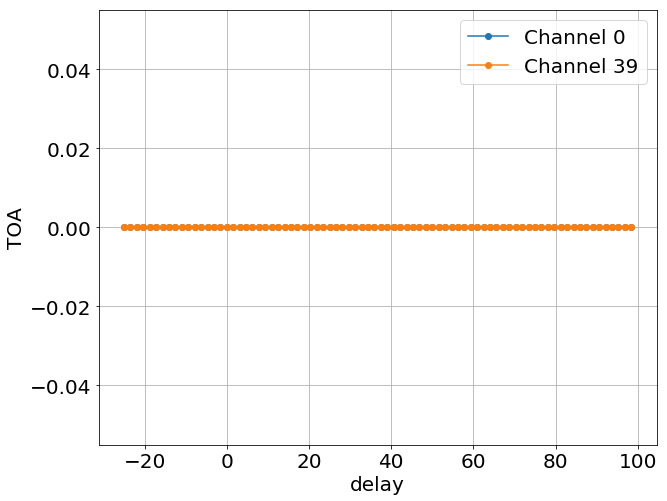

In [14]:
plt.figure(figsize = (10,8))

for chan in hit_chans:

    sel = df_chans.channel == chan
    df_sel = df_chans[sel]

    x = df_sel.delay
    y = df_sel.toa

    #x = (x-2)#%15
    plt.plot(x,y, "o-", label = "Channel %i" %chan)
    
plt.grid()
plt.legend()
plt.xlabel("delay")
plt.ylabel("TOA")

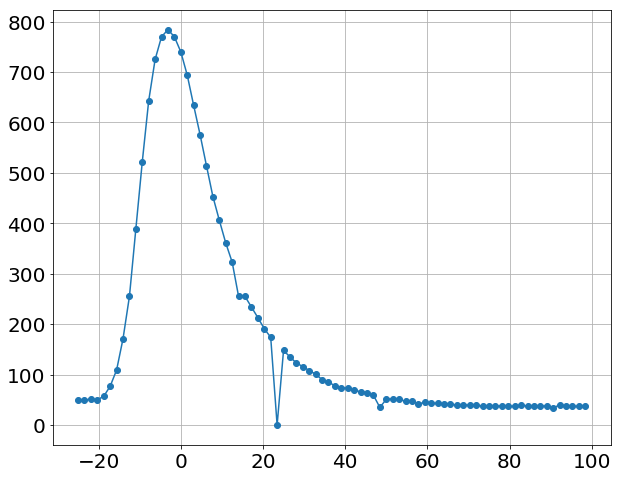

In [83]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
df_sel = df_chans[sel]

x = df_sel.delay
y = df_sel.adc

#x = (x-2)#%15
plt.plot(x,y , "o-")
plt.grid()

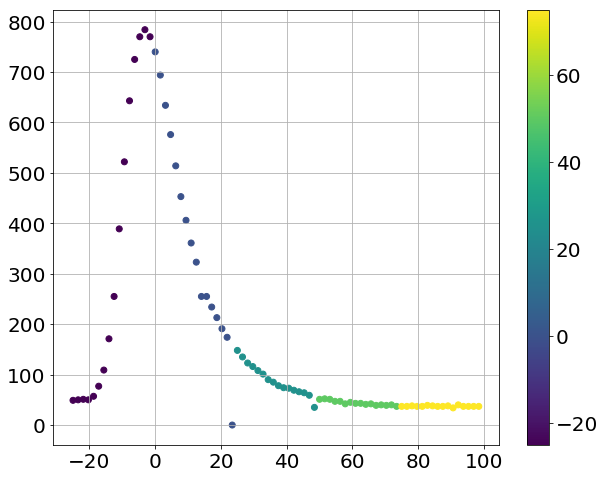

In [84]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
#sel &= df_chans.offset < 1
df_sel = df_chans[sel]

c = df_sel.offset
x = df_sel.delay
y = df_sel.adc

#x = (x-2)#%15
plt.scatter(x,y, c = c)
plt.grid()
plt.colorbar()

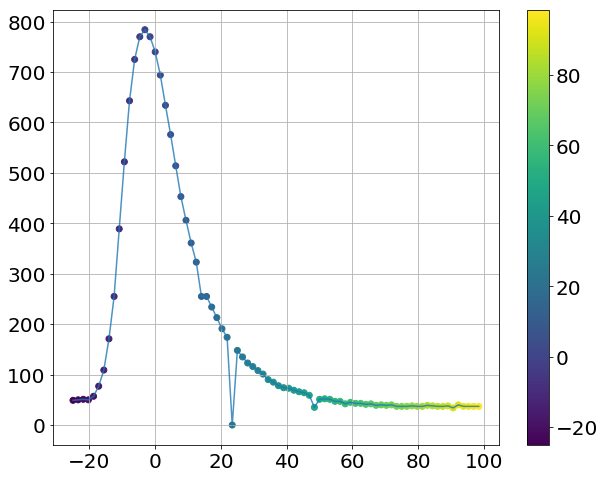

In [85]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
#sel &= df_chans.offset < 1
df_sel = df_chans[sel]

x = df_sel.delay
y = df_sel.adc

plt.scatter(x,y, c=df_sel.delay)
plt.plot(x,y , "-", alpha = 0.8)

plt.grid()
plt.colorbar()

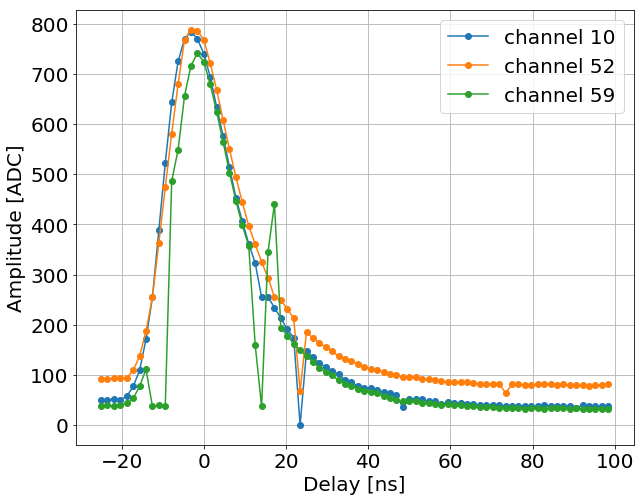

In [86]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    #sel &= df_chans.offset < 1
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index
    y = prof.values

    plt.plot(x,y , "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

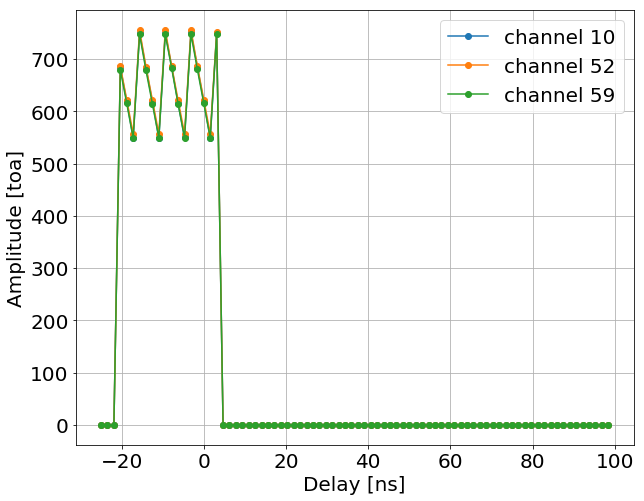

In [87]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    #sel &= df_chans.offset > -1
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["toa"].median()
    x = prof.index
    y = prof.values

    plt.plot(x,y , "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [toa]")

plt.grid()

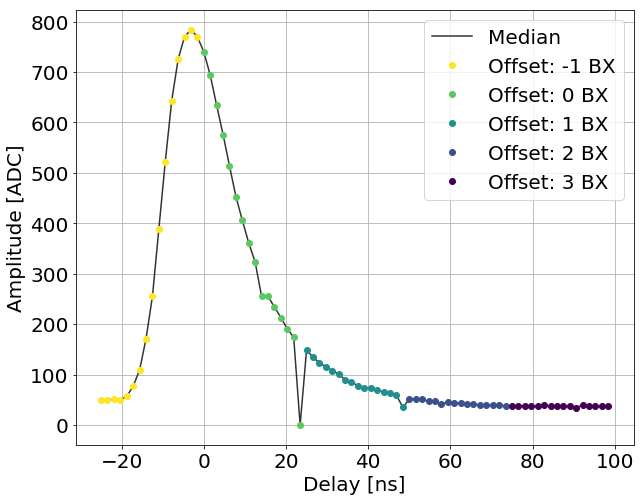

In [88]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
#sel &= df_chans.offset < 1
df_sel = df_chans[sel]

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-", alpha = 0.8, label = "Median")

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

offs = df_sel.offset.unique()
colors = plt.cm.viridis_r(np.linspace(0,1,len(offs)))

for i, offset in enumerate(offs):
    col = colors[i]
    #col = "C%i"%i
    
    sel = df_sel.offset == offset

    x = df_sel[sel].delay
    y = df_sel[sel].adc

    plt.plot(x,y, "o", color =  col, label = "Offset: %i BX"%(offset//25))

plt.legend()

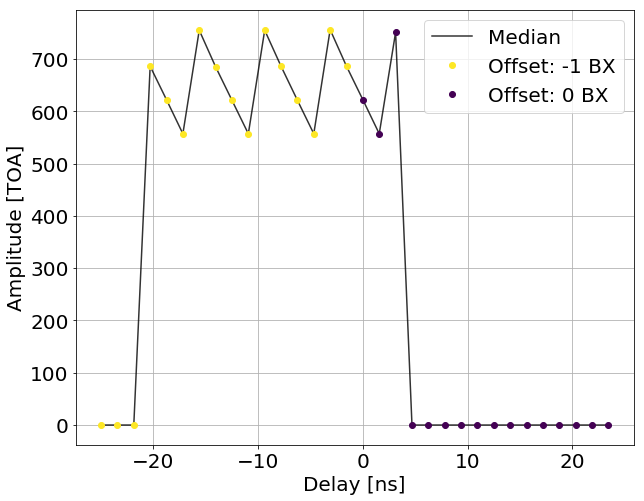

In [89]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == 52
sel &= df_chans.offset < 2
df_sel = df_chans[sel]

# profile
mean = df_sel.groupby("delay")["toa"].median()
x = mean.index
y = mean.values

plt.plot(x,y , "k-", alpha = 0.8, label = "Median")

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [TOA]")

plt.grid()

offs = df_sel.offset.unique()
colors = plt.cm.viridis_r(np.linspace(0,1,len(offs)))

for i, offset in enumerate(offs):
    col = colors[i]
    #col = "C%i"%i
    
    sel = df_sel.offset == offset

    x = df_sel[sel].delay
    y = df_sel[sel].toa

    plt.plot(x,y, "o", color =  col, label = "Offset: %i BX"%(offset//25))

plt.legend()

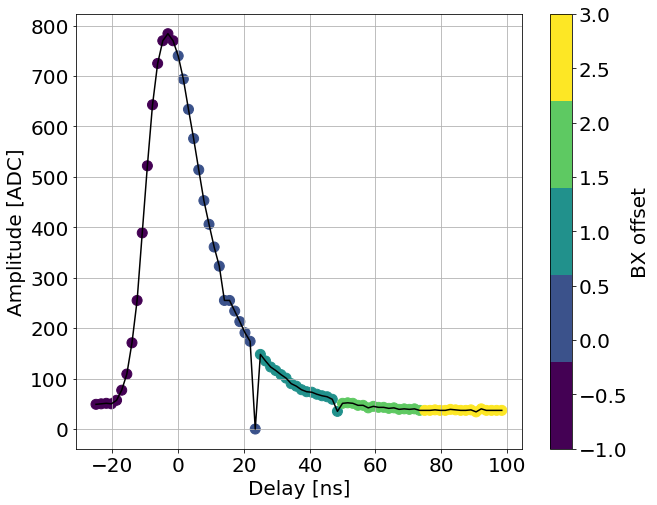

In [90]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
#sel &= df_chans.offset < 1
df_sel = df_chans[sel]

## color
x = df_sel.delay
y = df_sel.adc

cmap = plt.get_cmap('viridis', len(df_sel.offset.unique())) 

plt.scatter(x,y, s =100, c=df_sel.offset//25,cmap = cmap)
plt.colorbar(label = "BX offset")

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

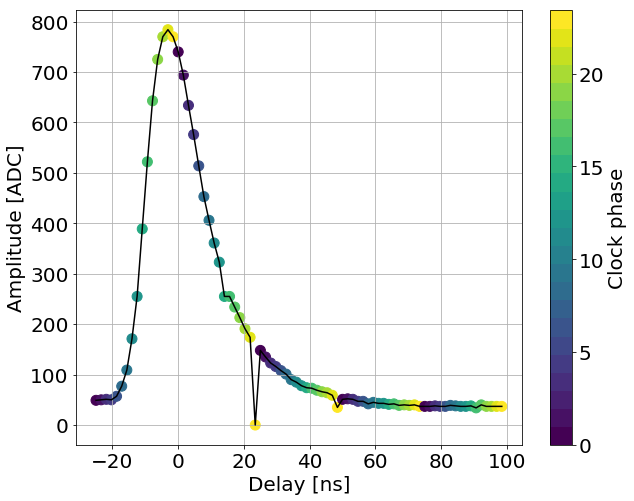

In [91]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
#sel &= df_chans.offset < 1
df_sel = df_chans[sel]

## color
x = df_sel.delay
y = df_sel.adc

cmap = plt.get_cmap('viridis', 24) #df_sel.offset.unique())) 

plt.scatter(x,y, s =100, c=df_sel.phase,cmap = cmap)
plt.colorbar(label = "Clock phase")

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

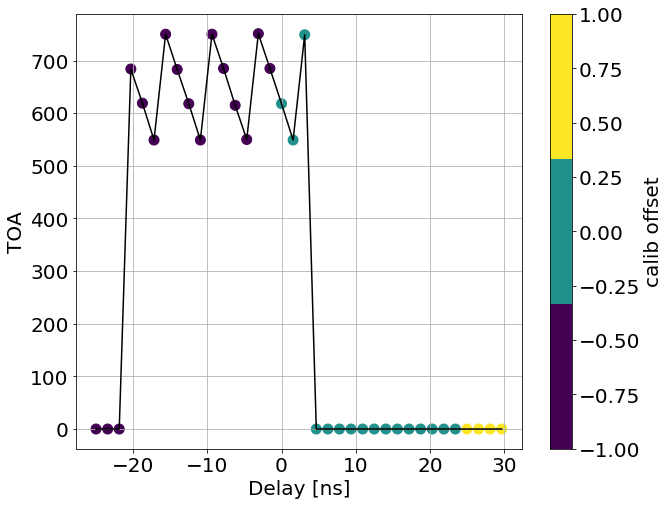

In [92]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
sel &= df_chans.delay < 30
df_sel = df_chans[sel]

## color
x = df_sel.delay
y = df_sel.toa

cmap = plt.get_cmap('viridis', len(df_sel.offset.unique())) 

plt.scatter(x,y, s =100, c=df_sel.offset//25,cmap = cmap)
plt.colorbar(label = "calib offset")

# profile
mean_toa = df_sel.groupby("delay")["toa"].median()
x = mean_toa.index
y = mean_toa.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("TOA")

plt.grid()

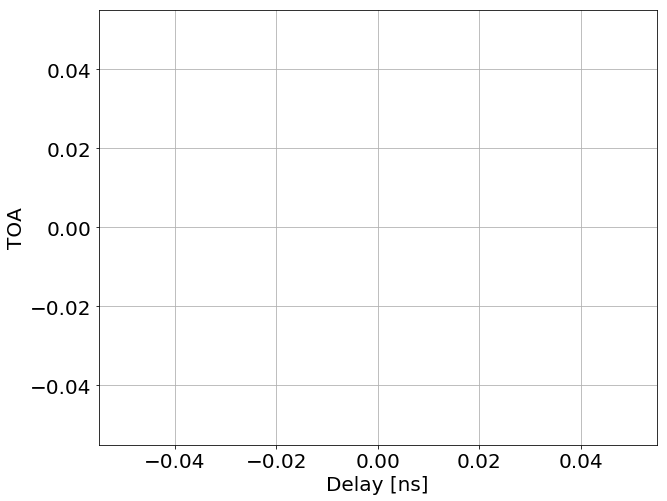

In [93]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
sel &= df_chans.delay < 30
df_sel = df_chans[sel]

# profile
mean_toa = df_sel.groupby("delay")["toa"].std()
x = mean_toa.index
y = mean_toa.values

plt.plot(x,y , "ko-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("TOA")

plt.grid()

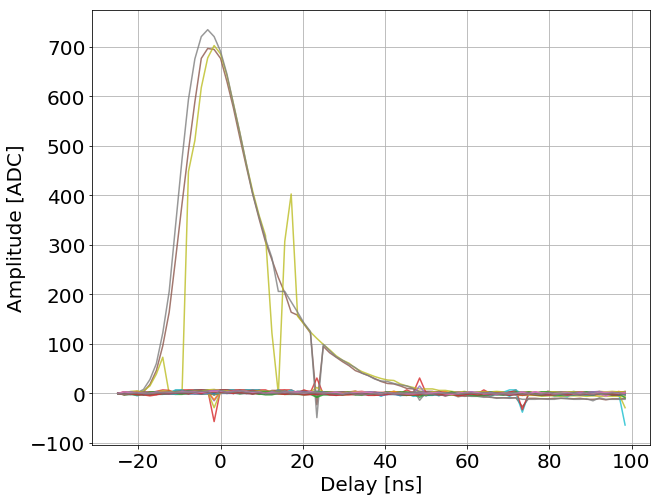

In [94]:
plt.figure(figsize = (10,8))

for chan in df_chans.channel.unique():
    sel = df_chans.channel == chan
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index
    y = prof.values

    y -= y[0]
    #y /= y.max()
    
    plt.plot(x,y , "-", alpha = 0.8, label = chan)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")
    
#plt.legend()

plt.grid()

Maximum at delay -3.125
Maximum at delay -3.125
Maximum at delay -1.5625


(-25, 25)

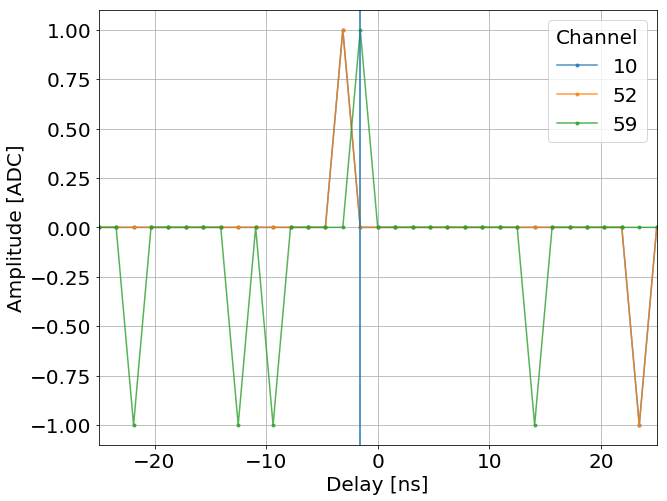

In [95]:
plt.figure(figsize = (10,8))

#for chan in df_chans.channel.unique():
#chans = sorted(df_chans.channel.unique())
#chans = [9,10,36,37,38]
chans = hit_chans

for chan in chans:
    sel = df_chans.channel == chan
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index
    y = prof.values
    
    sel = ~np.isnan(x) & ~np.isnan(y)
    x = x[sel]; y = y[sel]

    if not np.any(y): continue # check not empty return
    y -= y[0]
    y /= y.max()
    
    plt.plot(x,y , ".-", alpha = 0.8, label = chan)
    
    print "Maximum at delay", x[y.argmax()]

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")
    
plt.legend(title = "Channel")

plt.gca().axvline(x[y.argmax()], 0,1)

plt.grid()
plt.xlim(-25,25)

# Cross-talk

/home/hgcal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


49
66
12
36
28


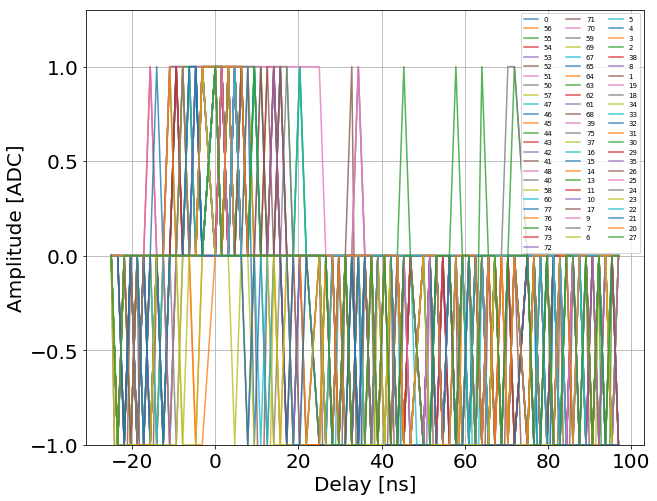

In [96]:
plt.figure(figsize = (10,8))

for chan in df_chans.channel.unique():
    sel = df_chans.channel == chan
    sel &= df_chans.phase != 15*25/16.

    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].mean()
    x = prof.index
    y = prof.values

    y -= y[0]
    y /= y.max()
    
    #plt.plot(x,y , "-", alpha = 0.8, label = chan)
    
    if np.sum(y) == 0:
        print chan

    else:
        plt.plot(x,y , "-", alpha = 0.8, label = chan)
        
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")
    
plt.legend(ncol = 3, fontsize = 7)

plt.ylim(-1,1.3)

plt.grid()

12 empty
36 empty


/home/hgcal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide


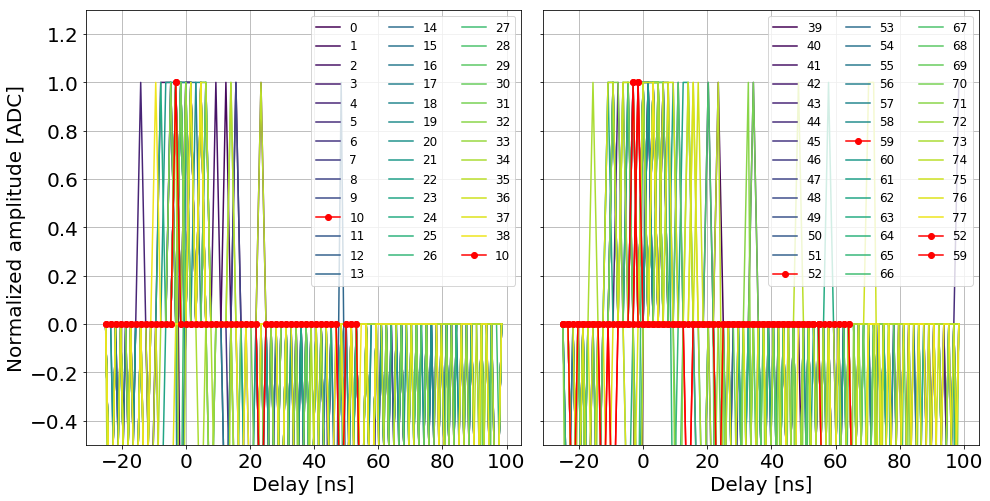

In [97]:
f, axs = plt.subplots(1,2, figsize = (16,8), sharey = True)

chans = sorted(df_chans.channel.unique()) + hit_chans.tolist()

colors = plt.cm.viridis(np.linspace(0,1,len(chans)/2))

for chan in chans:
    col = colors[chan%39]
    
    ax = axs[0] if chan < 39 else axs[1]
    
    sel = df_chans.channel == chan
    #sel &= df_chans.phase != 15*25/16.

    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].mean()
    x = prof.index
    y = prof.values

    if np.sum(y) == 0:
        print chan, "empty"
        #continue
    else:
        y -= y[0]
        y /= y.max()
    
    if chan in hit_chans:
        col = "r"
        style = "o-"
    else:
        style = "-"
    
    ax.plot(x,y , style, label = chan, color = col)
    
axs[0].set_ylabel("Normalized amplitude [ADC]")

for ax in axs:
    ax.set_xlabel("Delay [ns]")
    ax.legend(ncol = 3, fontsize = 12)

    ax.set_ylim(-.5,1.3)
    ax.grid()
    
f.subplots_adjust(wspace=0.05)